In [1]:
from tes.data import Data, EventStream
import numpy as np
import matplotlib.pyplot as plt

In [2]:
trace_dt=np.dtype([('raw','i4'),('filtered','i4'),('slope','i4')])

In [3]:
traces=np.fromfile('data/traces',trace_dt)

In [4]:
traces=Data.fromfile('traces',trace_dt,'teslib','channel_TB',tool='vivado')

<IPython.core.display.Javascript object>


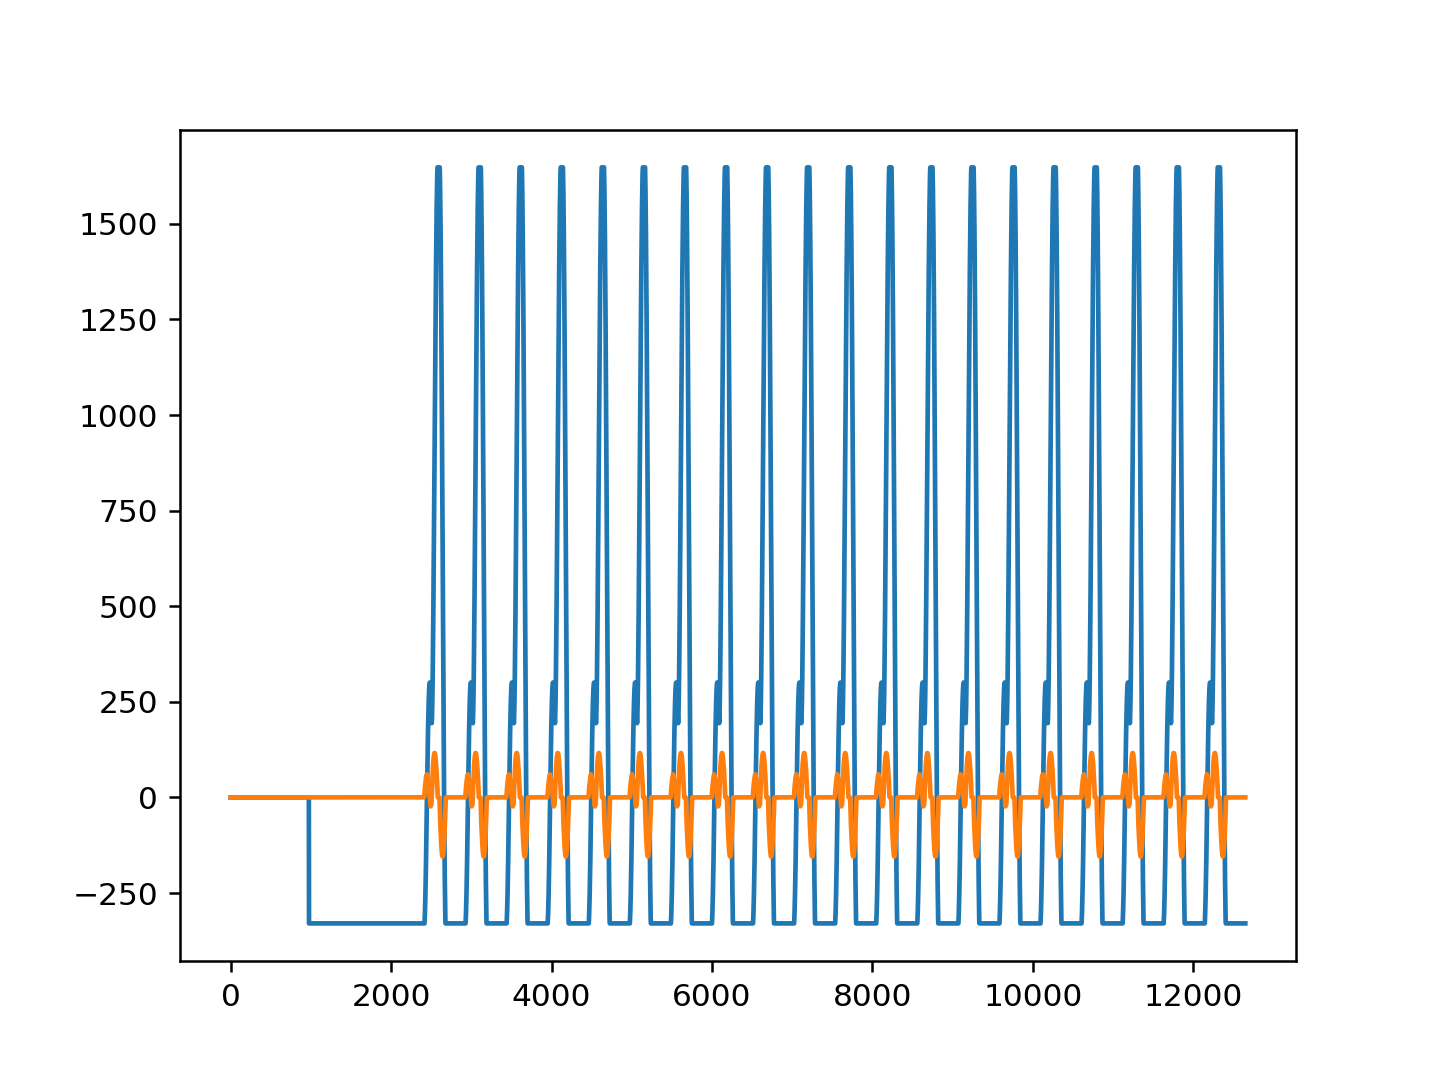

In [5]:
%matplotlib notebook
plt.plot(traces['filtered'][100:]/8)
plt.plot(traces['slope'][100:]/64)

In [ ]:
stream=Data.

In [ ]:
stream_dt=np.dtype([('data','u8'),('last','i4')])
stream=np.fromfile('data/stream',stream_dt)

In [ ]:
stream=Data.fromfile('stream',stream_dt,'teslib','channel_TB',tool='vivado')
data=np.copy(stream['data'].byteswap()).view(np.uint8)

In [ ]:
last = np.where(stream['last']<0)[0]*8+1 

In [ ]:
last

In [ ]:
np.where(stream['last']<0)[0]*8

In [29]:
es = EventStream('stream','teslib','channel_TB',tool='vivado')

In [7]:
es.last

array([ 216,  432,  648,  864, 1080, 1296, 1512, 1728, 1944, 2160, 2376,
       2592, 2808, 3024, 3240, 3456, 3672, 3888, 4104, 4320, 4536, 4752,
       4968, 5184, 5400, 5616], dtype=int64)

In [8]:
len(es.last)

26

<IPython.core.display.Javascript object>


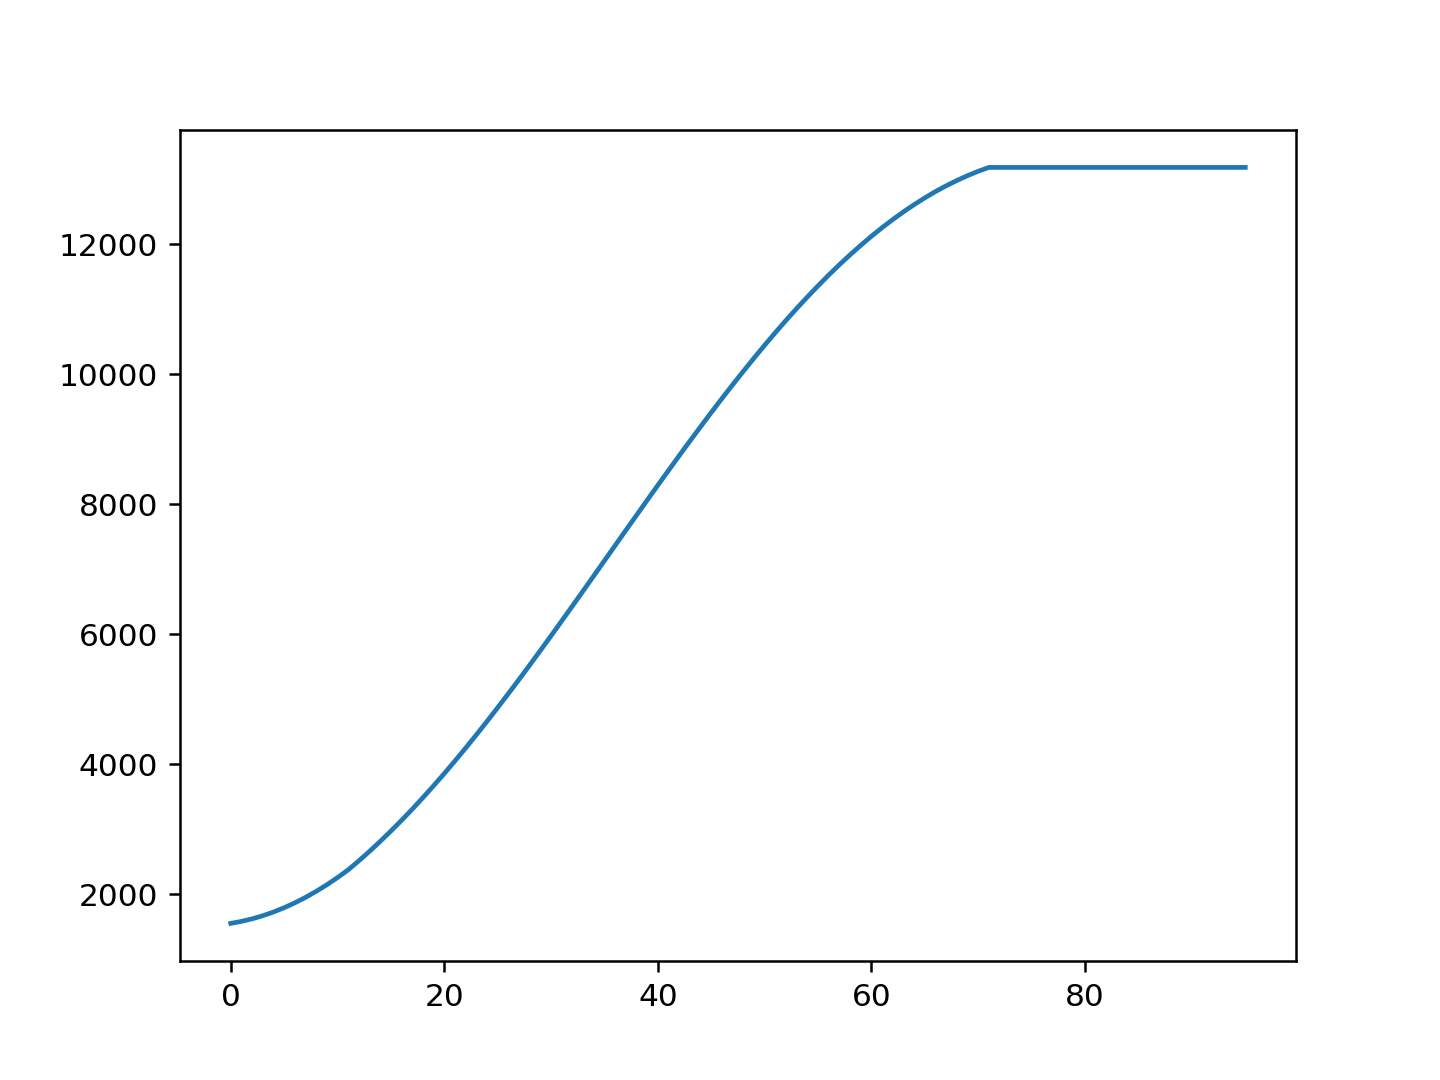

In [42]:
%matplotlib notebook
plt.plot(es[11][24:].view(np.int16))

In [47]:
np.ceil(np.log2(32+1))

6.0

In [ ]:
'{:08X}'.format(stream[0][0])

In [ ]:
stream[0]

In [ ]:
data[:8]

In [ ]:
trace_dt=(
    [
        ('size',np.uint16),('tflags0',np.uint8),('tflags1',np.uint8),('flags0',np.uint8),
        ('flags1',np.uint8),('time',no.uint16),('area',np.uint32),('length',np.uint16),
        ('offset',np.uint16),
        
    ]
)

In [ ]:
trace.view(np.uint8)

In [ ]:
event_dt=np.dtype([('rise','>i2'),('height','>i2'),('time','>i2'),('flags','>i2')])

In [ ]:
events=stream['data'].view(event_dt)

In [ ]:
'{:X}'.format(events['flags'][0])

In [ ]:
events['rise']

In [ ]:
events

In [ ]:
'{:04X}'.format(events['flags'][1])

In [ ]:
pulse_peak_dt=np.dtype([('time','>i2'),('minima','>i2'),('rise','>u2'),('height','>i2')])
pulse_dt=np.dtype([('time','>i2'),('flags','>i2'),('resv','>i2'),('size','>u2'),
                  ('offset','>i2'),('length','>i2'),('area','>i4'),('peaks',(pulse_peak_dt,1))])
data=np.copy(stream['data'])

In [ ]:
pulses=data.view(pulse_dt)

In [ ]:
pulses['peaks']['height']-pulses['peaks']['minima']

In [ ]:
pulses['peaks']['minima']

In [ ]:
peak_count=np.right_shift(np.bitwise_and(pulses['flags'],0xF000),12)
peak_overflow=np.bitwise_and(pulses['flags'],0x0800)!=0
channel=np.right_shift(np.bitwise_and(pulses['flags'],0x0700),8)
timing_type=np.right_shift(np.bitwise_and(pulses['flags'],0x00C0),6)
height_type=np.right_shift(np.bitwise_and(pulses['flags'],0x0030),4)
event_type=np.right_shift(np.bitwise_and(pulses['flags'],0x000E),1)
new_window=np.bitwise_and(pulses['flags'],0x0001)!=0

In [ ]:
peak_overflow

In [ ]:
test_dt=np.dtype(
    [('time','i2'),('flags','i2'),('rise','u2'),('minima','i2'),('low','u8'),('high','u8')]
)
test=data.view(test_dt)

In [ ]:
test

In [ ]:
test['minima']

In [ ]:
low1=np.int32(np.right_shift(np.bitwise_and(test['low'],0x03FFFF000000000),36))
s=(np.bitwise_and(low1,0x00020000)!=0)*0xFFFC0000
low2=np.int32(np.right_shift(np.bitwise_and(test['low'],0x000000FFFFC0000),18))
low_threshold=np.int32(np.bitwise_and(test['low'],0x00000000003FFFF))
high1=np.int32(np.right_shift(np.bitwise_and(test['high'],0x03FFFF000000000),36))
high2=np.int32(np.right_shift(np.bitwise_and(test['high'],0x000000FFFFC0000),18))
high_threshold=np.int32(np.bitwise_and(test['high'],0x00000000003FFFF))

In [ ]:
np.int32(np.bitwise_or(low1,s))/8.0

In [ ]:
'{:04X}'.format(low1[0])

In [ ]:
high1/8.0

In [ ]:
high2/8.0

In [ ]:
'{:04X}'.format(high_threshold[0])